In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.offline as py
from plotly import tools
import plotly.graph_objs as go

from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
# Read Data from CSV File
url = "https://raw.githubusercontent.com/neha-mishra/Evaluation-Projects/main/Customer_Churn_Analysis/Telecom_customer_churn.csv"
df = pd.read_csv(url)

# Adjust index to start from 1 instead of 0
df.index += 1

In [4]:
# Show top 5 rows of DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Check DataFrame Shape
df.shape

(7043, 21)

In [6]:
# Get full info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 1 to 7043
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

In [8]:
# Get Summery of DataFrame
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [9]:
# Get DataFrame of rows with missing data
null_data = df[df.isnull().any(axis=1)]
null_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


<AxesSubplot:>

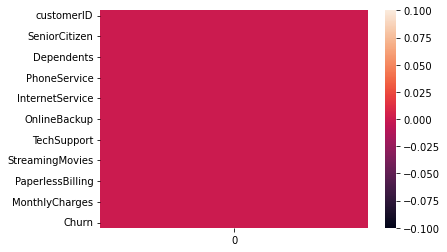

In [10]:
# Check DataFrame for null value
sns.heatmap(df.isnull().sum().to_frame())

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#Unique values in each categorical variable
df["PaymentMethod"].nunique()
df["PaymentMethod"].unique()
df["Contract"].nunique()
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [13]:
# Check target variable distribution
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [14]:
# Label Encode Binary data

#Create a label encoder object
le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


# Data Visualization

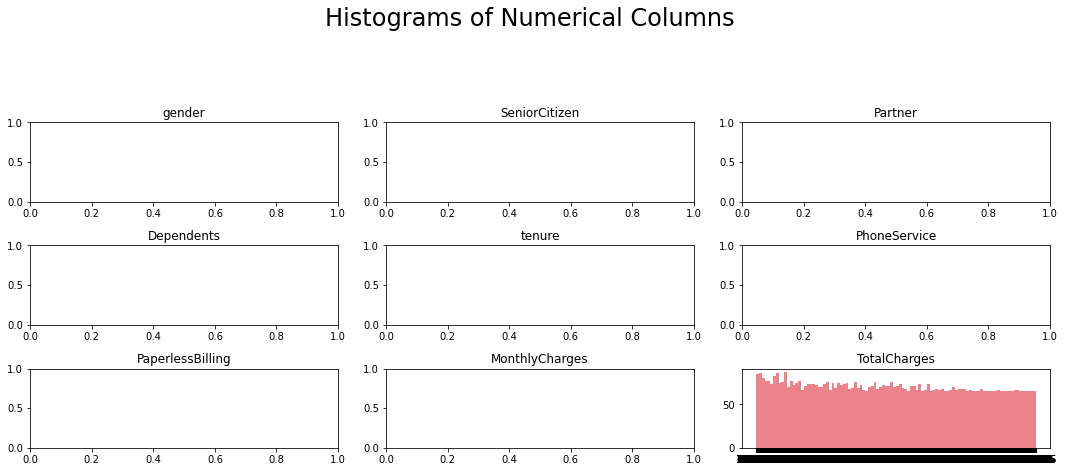

In [16]:
# histogram of numeric Columns
dataset2 = df[['gender', 'SeniorCitizen', 'Partner','Dependents', 'tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges', 'TotalCharges']]

#Histogram:    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    
vals = np.size(dataset2.iloc[:, i].unique())
if vals >= 100:
    vals = 100
    
plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

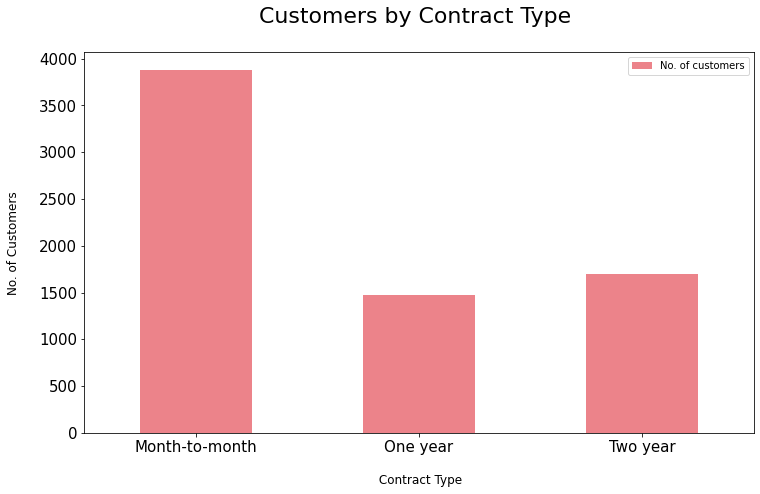

In [17]:
# Distribution of Categorical variables
contract_split = df[[ "customerID", "Contract"]]
sectors = contract_split .groupby ("Contract")

contract_split = pd.DataFrame(sectors["customerID"].count())
contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)

ax =  contract_split[["No. of customers"]].plot.bar(title = 'Customers by Contract Type',legend = True, table = False, 
grid = False,  subplots = False,figsize =(12, 7), color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Contract Type',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('Customers by Contract Type \n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.legend(fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
x_labels = np.array(contract_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
            label = "{:.0f}".format(y_value)      
        
            ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)  
        
add_value_labels(ax)

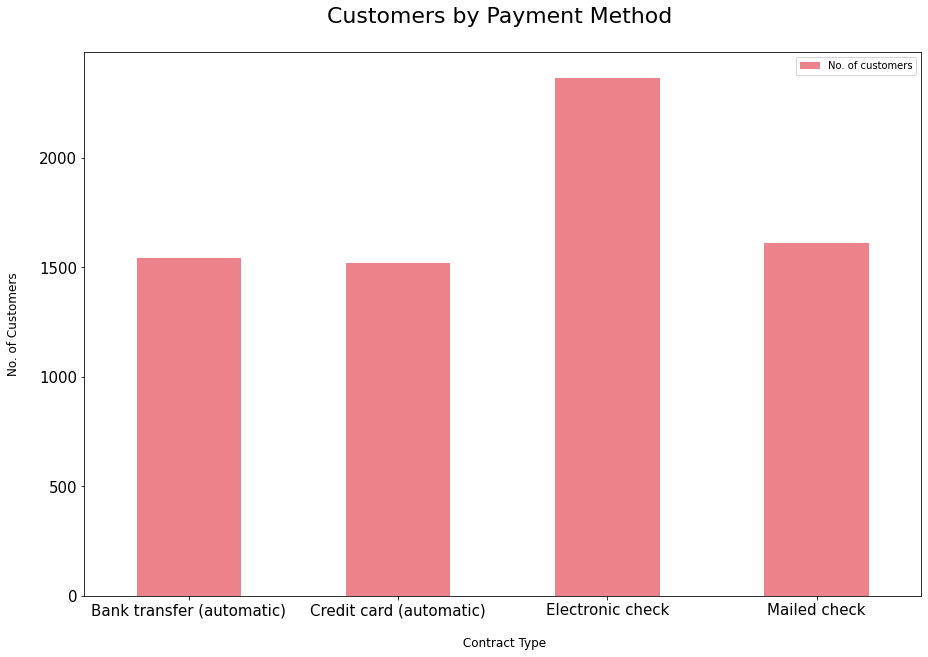

In [18]:
# Distribution of payment method
payment_method_split = df[[ "customerID", "PaymentMethod"]]
sectors = payment_method_split  .groupby ("PaymentMethod")
payment_method_split  = pd.DataFrame(sectors["customerID"].count())
payment_method_split.rename(columns={'customerID':'No. of customers'}, inplace=True)

ax =  payment_method_split [["No. of customers"]].plot.bar(title = 'Customers by Payment Method', legend =True, table = False, grid = False, subplots = False,  figsize =(15, 10),color ='#ec838a', fontsize = 15, stacked=False)

plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Contract Type',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('Customers by Payment Method \n',
horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(fontsize = "medium")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
x_labels = np.array(payment_method_split [["No. of customers"]])
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
            label = "{:.0f}".format(y_value)
     
            ax.annotate(label, (x_value, y_value), xytext=(0, space),textcoords="offset points", ha='center',va=va)
add_value_labels(ax)

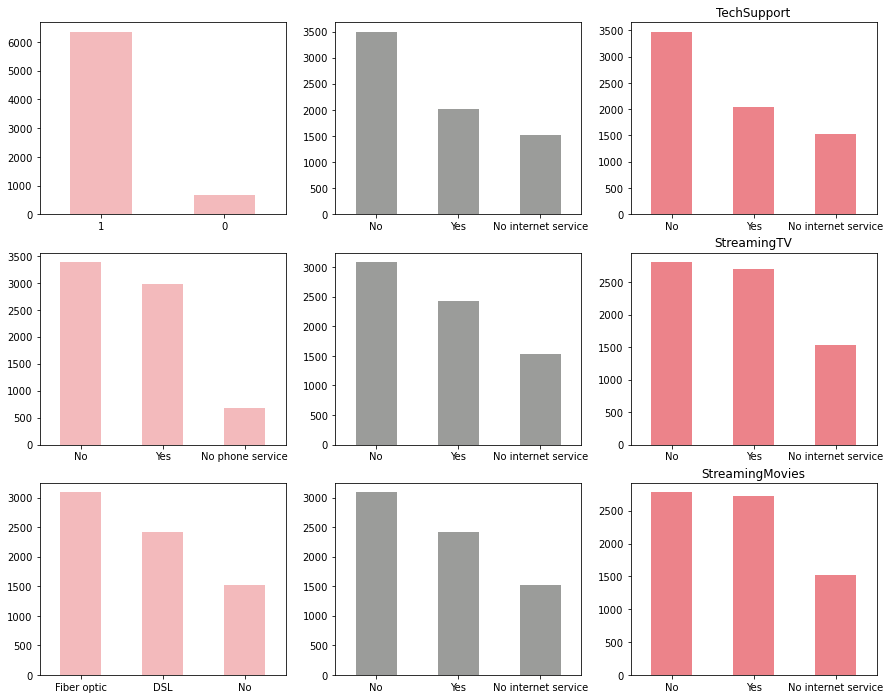

In [19]:
# Distribution of label encoded categorical variables
services= ['PhoneService','MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,
figsize = (15,12))

for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0], rot = 0, color ='#f3babc' )
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1], rot = 0,color ='#9b9c9a')
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0, color = '#ec838a')
        ax.set_title(item)

/var/folders/kx/l_6t03750z730_804m3zjdtw0000gn/T/ipykernel_3824/693262515.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



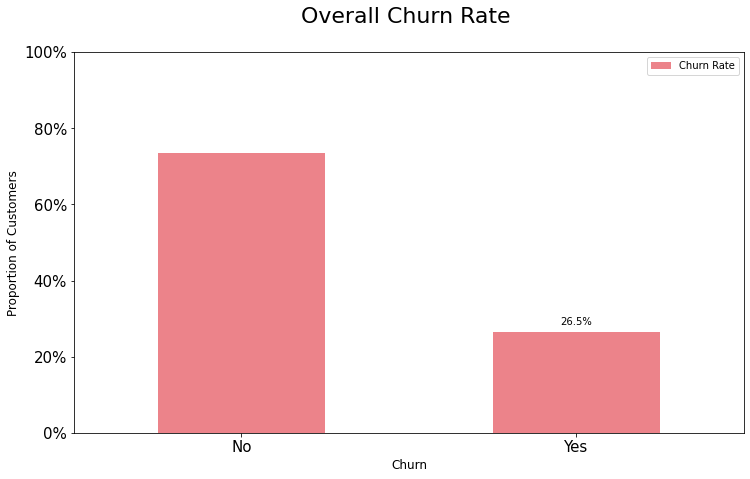

In [20]:
# Analyzing the churn rate by Categorical variables
import matplotlib.ticker as mtick

churn_rate = df[["Churn", "customerID"]]
churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))
sectors = churn_rate .groupby ("churn_label")
churn_rate = pd.DataFrame(sectors["customerID"].count())
churn_rate ["Churn Rate"] = (churn_rate ["customerID"]/ sum(churn_rate ["customerID"]) )*100
ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate',legend =True, table = False,grid = False,  subplots = False, 
figsize =(12, 7), color = '#ec838a', fontsize = 15, stacked=False, ylim =(0,100))

plt.ylabel('Proportion of Customers',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Churn',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.title('Overall Churn Rate \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

plt.legend(fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(churn_rate[["customerID"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:     
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing
        va = 'bottom'        
        if y_value < 0:           
            space *= -1          
            va = 'top'
        label = "{:.1f}%".format(y_value)    
 
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center',va=va)
    
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)

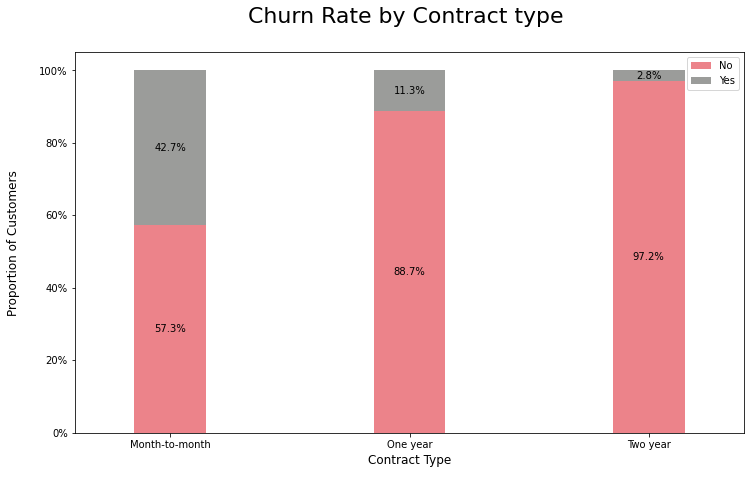

In [21]:
# Churn Rate by Contract Type
import matplotlib.ticker as mtick

contract_churn = df.groupby(['Contract','Churn']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Contract Type\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")

plt.title('Churn Rate by Contract type \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.legend(fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.1f}%'.format(height), horizontalalignment='center', verticalalignment='center')

ax.autoscale(enable=False, axis='both', tight=False)

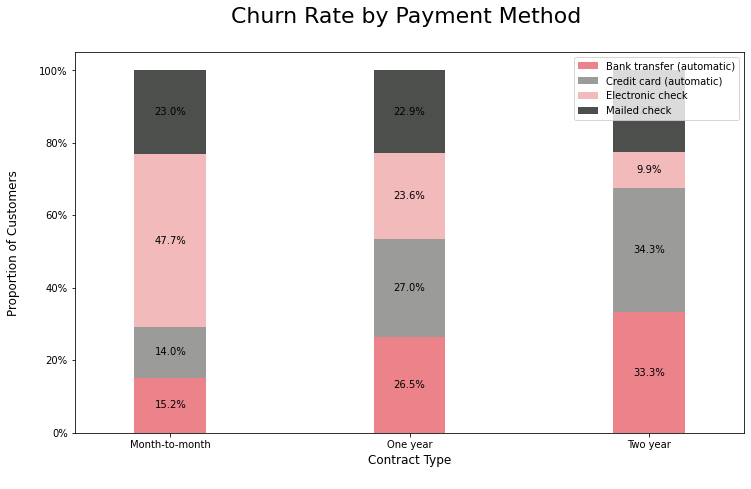

In [22]:
# Churn Rate by Payment Method Type
import matplotlib.ticker as mtick

contract_churn = df.groupby(['Contract','PaymentMethod']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a', '#f3babc' , '#4d4f4c']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7), color = colors)

plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Contract Type\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")

plt.title('Churn Rate by Payment Method \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.legend(fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.1f}%'.format(height), horizontalalignment='center', verticalalignment='center')

ax.autoscale(enable=False, axis='both', tight=False)

Most Positive Correlations: 
 MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
dtype: float64

Most Negative Correlations: 
 Partner      -0.150448
Dependents   -0.164221
tenure       -0.352229
dtype: float64


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

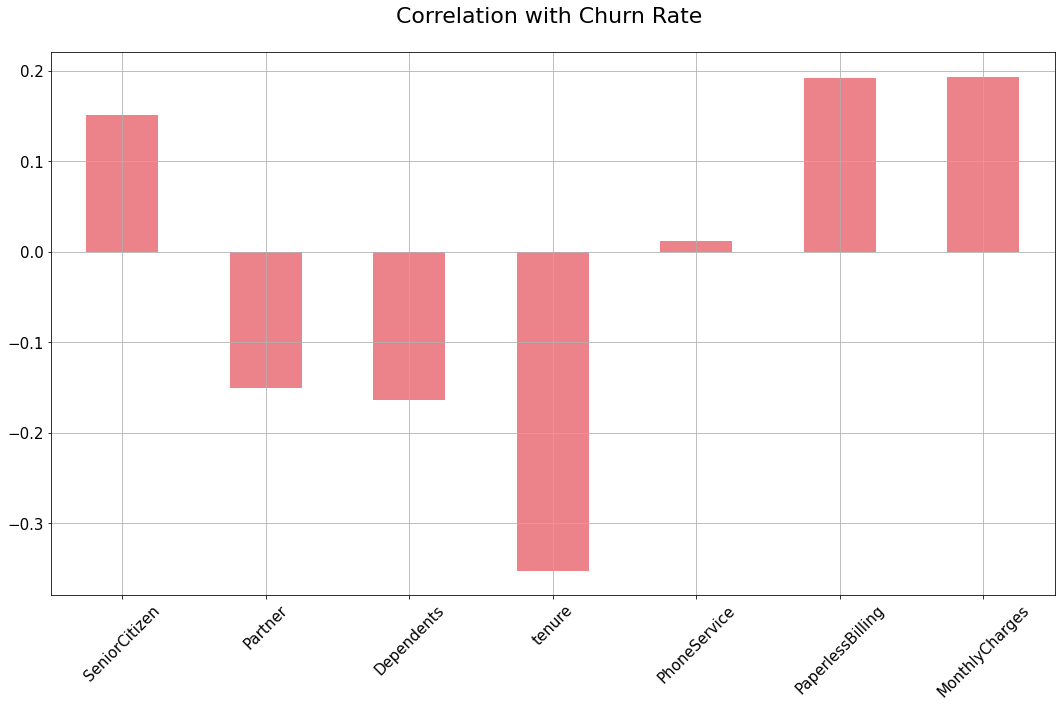

In [23]:
# positive and negative correlations
dataset2 = df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']]
correlations = dataset2.corrwith(df.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations = correlations[correlations<0].sort_values(ascending = False)

print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

# Plot
correlations = dataset2.corrwith(df.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(figsize = (18, 10), fontsize = 15, color = '#ec838a', rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

/var/folders/kx/l_6t03750z730_804m3zjdtw0000gn/T/ipykernel_3824/2422161808.py:7: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

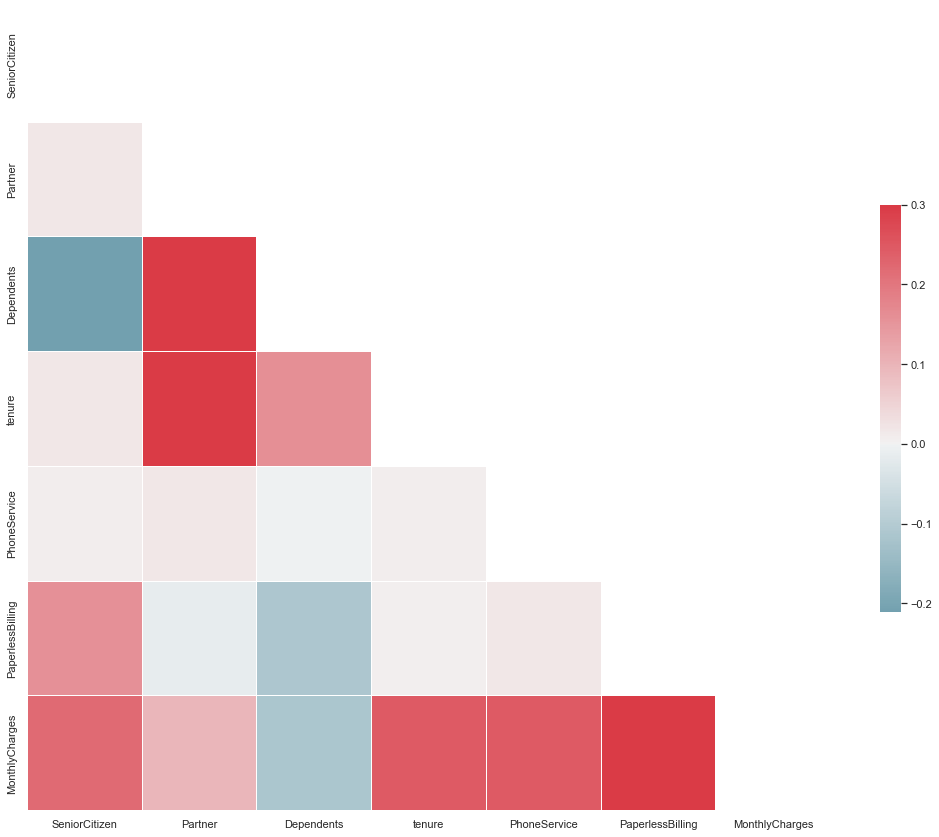

In [24]:
# Correlation Matrix of all independent variables

sns.set(style="white")
corr = dataset2.corr()

#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 1.0, 'Collinearity of Monthly Charges and Total Charges \n')

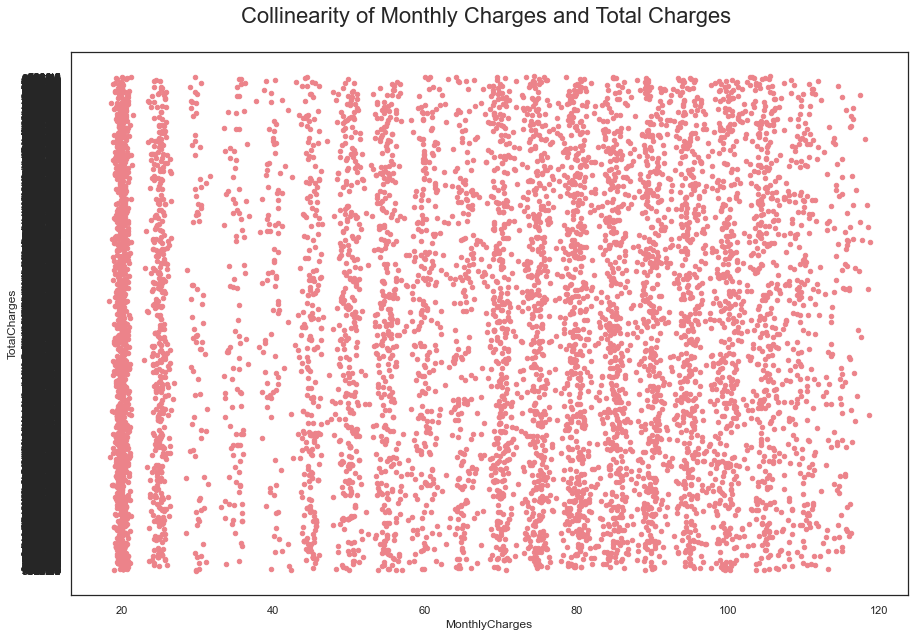

In [25]:
#Check colinearity:
    
dataset2[['MonthlyCharges', 'TotalCharges']].plot.scatter(figsize = (15, 10), x ='MonthlyCharges',y='TotalCharges', color =  '#ec838a')
plt.title('Collinearity of Monthly Charges and Total Charges \n',
horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)

dataset2 = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges', 'TotalCharges']]
calc_vif(dataset2)

In [27]:
#Dropping 'TotalCharges':
    
dataset2 = dataset2.drop(columns = "TotalCharges")

#Revalidate Colinearity:
dataset2 = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges']]
calc_vif(dataset2)

#Applying changes in the main dataset:
dataset = df.drop(columns = "TotalCharges")

In [28]:
# Encode Categorical data

#Incase if user_id is an object:
    
identity = df["customerID"]
dataset = df.drop(columns="customerID")

#Convert rest of categorical variable into dummy:
df = pd.get_dummies(dataset)

#Rejoin userid to dataset:
df = pd.concat([df, identity], axis = 1)

In [29]:
# Split dataset into dependent and independent variables

#Identify response variable:
response = df["Churn"]
df = df.drop(columns="Churn")

In [30]:
# Generate training and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, response,stratify=response, test_size = 0.2, random_state = 0)
#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5634, 6571)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 6571)
Number transactions y_test dataset:  (1409,)


In [31]:
# Remove Identifiers
train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])

test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])

In [32]:
# Feature Scaling
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [34]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

# Table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
model_result = pd.DataFrame(columns=col)    

def model_Results(name, model):
    
    # Evaluate model using k-fold cross-validation
    kfold = model_selection.KFold(n_splits=10)
    
    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)

    names.append(name)
    model_result = [name, round(cv_auc_results.mean()*100, 2), round(cv_auc_results.std()*100, 2), 
                     round(cv_acc_results.mean()*100, 2), round(cv_acc_results.std()*100, 2)]
    return model_result

In [42]:
model_Results1 = model_Results('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced'))
print(model_Results1)

['Logistic Regression', 78.28, 1.94, 67.09, 1.37]


In [43]:
model_Results2 = model_Results('SVC', SVC(kernel = 'linear', random_state = 0))
print(model_Results2)

['SVC', 77.15, 2.07, 74.32, 2.17]


In [38]:
model_Results3 = model_Results('Kernel SVM', SVC(kernel = 'rbf', random_state = 0))
print(model_Results3)

['Kernel SVM', 80.9, 1.61, 74.87, 1.45]


In [39]:
model_Results4 = model_Results('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))
print(model_Results4)

['KNN', 64.35, 2.44, 50.1, 6.6]


In [40]:
model_Results5 = model_Results('Gaussian NB', GaussianNB())
print(model_Results5)

['Gaussian NB', 49.2, 0.79, 28.33, 2.01]


In [41]:
model_Results6 = model_Results('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0))
print(model_Results6)

['Decision Tree Classifier', 68.05, 2.35, 76.11, 1.42]


In [45]:
model_Results7 = model_Results('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0))
print(model_Results7)

['Random Forest', 82.57, 2.11, 79.27, 1.27]


In [54]:
model_results.loc[1] = model_Results1
model_results.loc[2] = model_Results2
model_results.loc[3] = model_Results3
model_results.loc[4] = model_Results4
model_results.loc[5] = model_Results5
model_results.loc[6] = model_Results6
model_results.loc[7] = model_Results7

model_results

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Logistic Regression,78.28,1.94,67.09,1.37
2,SVC,77.15,2.07,74.32,2.17
3,Kernel SVM,80.90,1.61,74.87,1.45
4,KNN,64.35,2.44,50.10,6.60
5,Gaussian NB,49.20,0.79,28.33,2.01
6,Decision Tree Classifier,68.05,2.35,76.11,1.42
7,Random Forest,82.57,2.11,79.27,1.27


No handles with labels found to put in legend.


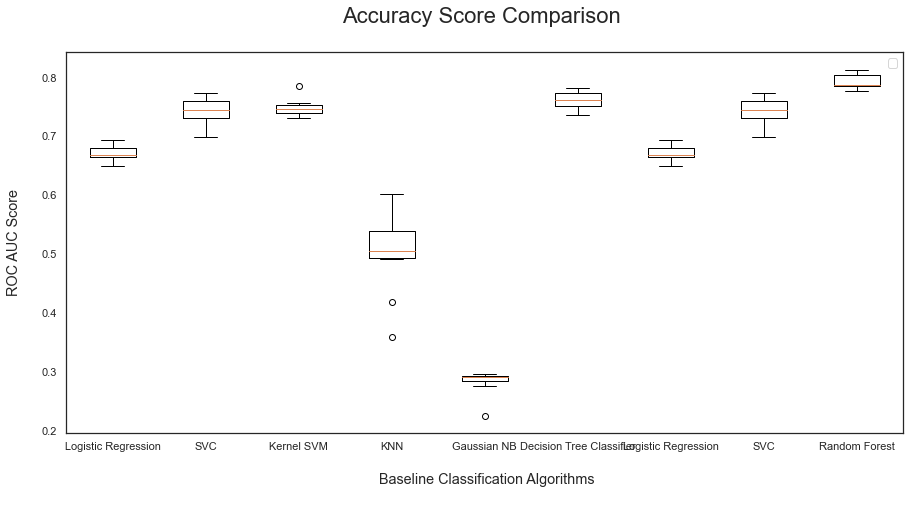

In [55]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")


plt.legend(fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

No handles with labels found to put in legend.


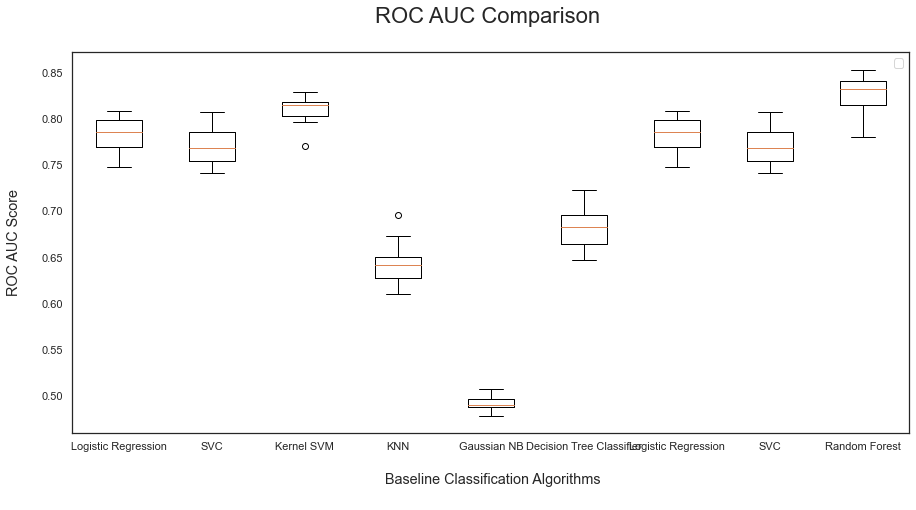

In [56]:
# Area under ROC Curve
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n', horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Baseline Classification Algorithms\n', horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

No handles with labels found to put in legend.


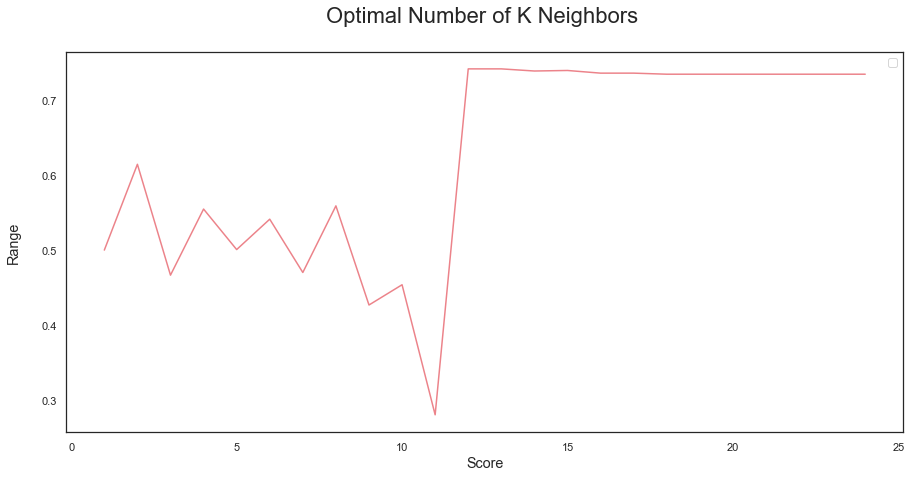

In [57]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
    #set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
    
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

No handles with labels found to put in legend.


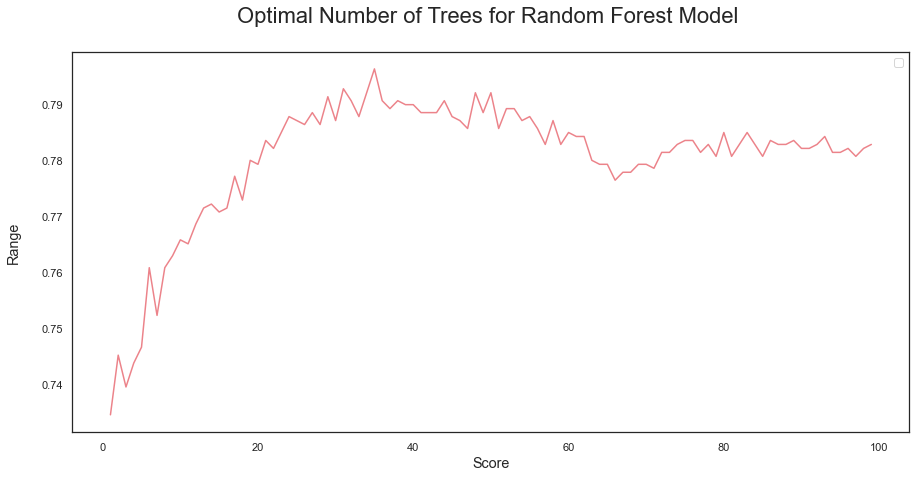

In [58]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(
    n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [60]:
# Logistic Regression
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score

# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.784244   0.623239  0.473262  0.537994  0.497191


/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [61]:
# Fitting SVM (SVC class) to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame(
[['SVM (Linear)', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.784244   0.623239  0.473262  0.537994  0.497191
1         SVM (Linear)  0.784244   0.623239  0.473262  0.537994  0.497191


In [62]:
# Fitting KNN to the Training set:
classifier = KNeighborsClassifier(
n_neighbors = 22, 
metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred  = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours', 
acc, prec, rec, f1, f2]], columns = ['Model',
 'Accuracy', 'Precision', 'Recall',
 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.784244   0.623239  0.473262  0.537994  0.497191
1          SVM (Linear)  0.784244   0.623239  0.473262  0.537994  0.497191
2  K-Nearest Neighbours  0.734564   0.000000  0.000000  0.000000  0.000000


/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [63]:
# Fitting Kernel SVM to the Training set:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Kernel SVM', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.784244   0.623239  0.473262  0.537994  0.497191
1          SVM (Linear)  0.784244   0.623239  0.473262  0.537994  0.497191
3            Kernel SVM  0.715401   0.477462  0.764706  0.587873  0.682578
2  K-Nearest Neighbours  0.734564   0.000000  0.000000  0.000000  0.000000


In [64]:
# Fitting Naive Byes to the Training set:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Naive Byes', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.784244   0.623239  0.473262  0.537994  0.497191
1          SVM (Linear)  0.784244   0.623239  0.473262  0.537994  0.497191
2            Kernel SVM  0.715401   0.477462  0.764706  0.587873  0.682578
4            Naive Byes  0.274663   0.258569  0.927807  0.404429  0.611346
3  K-Nearest Neighbours  0.734564   0.000000  0.000000  0.000000  0.000000


In [65]:
# Fitting Decision Tree to the Training set:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.784244   0.623239  0.473262  0.537994  0.497191
1          SVM (Linear)  0.784244   0.623239  0.473262  0.537994  0.497191
5         Decision Tree  0.759404   0.552553  0.491979  0.520509  0.503007
2            Kernel SVM  0.715401   0.477462  0.764706  0.587873  0.682578
3            Naive Byes  0.274663   0.258569  0.927807  0.404429  0.611346
4  K-Nearest Neighbours  0.734564   0.000000  0.000000  0.000000  0.000000


In [67]:
# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 72, 
criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', 
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.784244   0.623239  0.473262  0.537994  0.497191
1          SVM (Linear)  0.784244   0.623239  0.473262  0.537994  0.497191
6         Random Forest  0.778566   0.617424  0.435829  0.510972  0.463068
2         Decision Tree  0.759404   0.552553  0.491979  0.520509  0.503007
3            Kernel SVM  0.715401   0.477462  0.764706  0.587873  0.682578
4            Naive Byes  0.274663   0.258569  0.927807  0.404429  0.611346
5  K-Nearest Neighbours  0.734564   0.000000  0.000000  0.000000  0.000000


In [68]:
classifier = LogisticRegression(random_state = 0,
penalty = 'l2')
classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = classifier.predict(X_test)
#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression',
acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.784244   0.623239  0.473262  0.537994  0.497191


/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [71]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/n

Logistic Regression Classifier Accuracy: 0.78 (+/- 0.03)


/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Text(0.5, 12.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

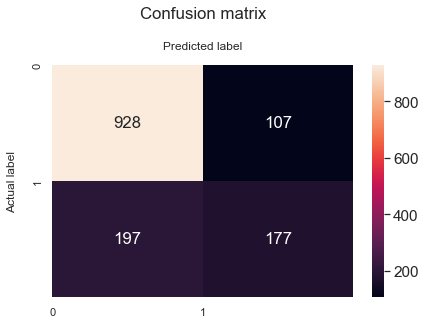

In [73]:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



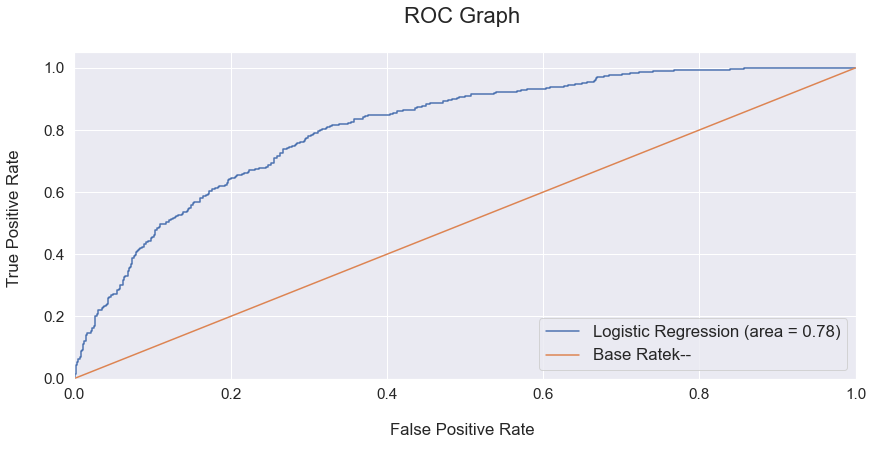

In [75]:
from sklearn.metrics import roc_curve

classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, 
label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [77]:
# Analyzing Coefficients
feature_importances = pd.concat([
pd.DataFrame(df.drop(columns = 'customerID').
columns, columns = ["features"]),
pd.DataFrame(np.transpose(classifier.coef_), 
columns = ["coef"])],axis = 1)
feature_importances.sort_values("coef", ascending = False)

,features,coef
12,InternetService_Fiber optic,0.569491
6,PaperlessBilling,0.559234
32,Contract_Month-to-month,0.477230
17,OnlineBackup_No,0.435878
23,TechSupport_No,0.415648
...,...,...
11,InternetService_DSL,-0.451246
36,PaymentMethod_Credit card (automatic),-0.457085
34,Contract_Two year,-0.489276
2,Partner,-0.630885


In [79]:
# Round 1:

from sklearn.model_selection import GridSearchCV
 
# Select Regularization Method   
import time
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Took 293.56 seconds


/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



(0.7068684192904171, {'C': 10, 'penalty': 'l2'})

In [80]:
# Round 2:
# Select Regularization Method
import time
penalty = ['l2']
# Create regularization hyperparameter space
C = [ 0.0001, 0.001, 0.01, 0.02, 0.05]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

Took 70.53 seconds


(0.6636161962650962, {'C': 0.05, 'penalty': 'l2'})

In [82]:
lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
lr_classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = lr_classifier.predict(X_test)
#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]


/Users/nehamishra/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[[928 107]
 [197 177]]
Test Data Accuracy: 0.7842


<Figure size 2016x1440 with 0 Axes>

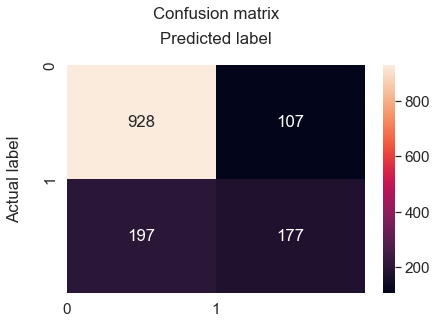

In [84]:
#Revalidate final results with Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
print (cm)
#Confusion Matrix as a quick Crosstab:
    
pd.crosstab(y_test,pd.Series(y_pred),
rownames=['ACTUAL'],colnames=['PRED'])
#visualize Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [85]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)
final_results = final_results[['customerID', 'Churn', 'predictions', 'propensity_to_churn(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (final_results)


      customerID  Churn  predictions  propensity_to_churn(%) Ranking
5533  8174-LNWMW      0            0                    0.00      10
5174  2480-SQIOB      0            0                    7.71       4
7011  0723-DRCLG      1            1                   99.80       1
6508  5708-EVONK      1            0                   13.39       4
5986  3585-YNADK      0            0                    0.01       9
...          ...    ...          ...                     ...     ...
3334  4573-JKNAE      0            0                    0.03       8
3054  0960-HUWBM      0            0                    0.46       6
6921  2595-KIWPV      0            0                    0.00       9
4697  9128-CPXKI      0            0                    2.32       5
2247  7181-BQYBV      1            1                   87.75       1

[1409 rows x 5 columns]
